In [21]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import re


In [22]:
#Reading the Dataset
xls = pd.ExcelFile('HospitalDatabase .xlsx')
#Reading the ReAdmissionRegistry sheet
df_RR = pd.read_excel(xls, 'ReAdmissionRegistry')
#Reading the Patients sheet
df_PA = pd.read_excel(xls, 'Patients')
#Reading the EDVisits sheet
df_EDV= pd.read_excel(xls, 'EDVisits')
#Reading the AmbulatoryVisits sheet
df_AV = pd.read_excel(xls, 'AmbulatoryVisits')
#Reading the Discharges sheet
df_D = pd.read_excel(xls, 'Discharges')
#Reading the Providers sheet
df_P= pd.read_excel(xls, 'Providers')
#Reading the EDUnique sheet
df_EDU = pd.read_excel(xls, 'EDUnique')

In [23]:
ls_df=[df_RR,df_PA,df_EDV,df_AV,df_D,df_P,df_EDU]
ls_name = ['Readmission Registry','Patients','ED Visits' ,'Ambulatory Visits','Discharges','Providers','ED Unique']

for i, value in enumerate(ls_name):
        print("DataFrame:",value)
        df=pd.DataFrame(ls_df[i])
        print(df.shape)


DataFrame: Readmission Registry
(720, 12)
DataFrame: Patients
(945, 7)
DataFrame: ED Visits
(1199, 7)
DataFrame: Ambulatory Visits
(950, 11)
DataFrame: Discharges
(720, 9)
DataFrame: Providers
(40, 4)
DataFrame: ED Unique
(945, 7)


In [24]:
for i, value in enumerate(ls_name):
        print("DataFrame:",value)
        df=pd.DataFrame(ls_df[i])
        print(df.info)


DataFrame: Readmission Registry
<bound method DataFrame.info of      AdmissionID  PatientID AdmissionDate           DischargeDate  \
0            389          1    2018-01-01 2018-01-04 19:59:31.391   
1            635          2    2018-01-01 2018-01-04 21:28:51.898   
2            606          3    2018-01-01 2018-01-04 22:28:23.672   
3            587          5    2018-01-01 2018-01-05 05:47:04.933   
4            640          6    2018-01-01 2018-01-05 14:18:30.029   
..           ...        ...           ...                     ...   
715          521        738    2018-02-22 2018-03-07 21:22:10.061   
716          548        739    2018-02-22 2018-03-08 02:43:18.749   
717          509        740    2018-02-22 2018-03-08 09:27:18.377   
718          605        741    2018-02-22 2018-03-10 06:06:12.068   
719          710        742    2018-02-22 2018-03-10 20:38:30.568   

    DischargeDisposition           Service PrimaryDiagnosis  ExpectedLOS  \
0                   Home       

In [25]:
for i, value in enumerate(ls_name):
        print("DataFrame:",value)
        df=pd.DataFrame(ls_df[i])
        print(df.head)


DataFrame: Readmission Registry
<bound method NDFrame.head of      AdmissionID  PatientID AdmissionDate           DischargeDate  \
0            389          1    2018-01-01 2018-01-04 19:59:31.391   
1            635          2    2018-01-01 2018-01-04 21:28:51.898   
2            606          3    2018-01-01 2018-01-04 22:28:23.672   
3            587          5    2018-01-01 2018-01-05 05:47:04.933   
4            640          6    2018-01-01 2018-01-05 14:18:30.029   
..           ...        ...           ...                     ...   
715          521        738    2018-02-22 2018-03-07 21:22:10.061   
716          548        739    2018-02-22 2018-03-08 02:43:18.749   
717          509        740    2018-02-22 2018-03-08 09:27:18.377   
718          605        741    2018-02-22 2018-03-10 06:06:12.068   
719          710        742    2018-02-22 2018-03-10 20:38:30.568   

    DischargeDisposition           Service PrimaryDiagnosis  ExpectedLOS  \
0                   Home       Ho

In [26]:
for i, value in enumerate(ls_name):
        print("DataFrame:",value)
        df=pd.DataFrame(ls_df[i])
        print(df.describe())


DataFrame: Readmission Registry
       AdmissionID   PatientID  ExpectedLOS  ExpectedMortality  \
count   720.000000  720.000000   720.000000         720.000000   
mean    360.500000  366.158333     8.824589           0.338063   
std     207.990384  218.223501     4.034421           0.238868   
min       1.000000    1.000000     2.012974           0.000006   
25%     180.750000  175.750000     5.138501           0.139771   
50%     360.500000  353.500000     8.633825           0.297242   
75%     540.250000  557.250000    12.107623           0.496387   
max     720.000000  742.000000    16.998213           0.989945   

       ReadmissionFlag  DaysToReadmission  EDVisitAfterDischargeFlag  
count            194.0         194.000000                      341.0  
mean               1.0           5.360825                        1.0  
std                0.0           3.866116                        0.0  
min                1.0           1.000000                        1.0  
25%               

In [27]:
for i, value in enumerate(ls_name):
        print("DataFrame:",value)
        df=pd.DataFrame(ls_df[i])
        print(df.columns)

DataFrame: Readmission Registry
Index(['AdmissionID', 'PatientID', 'AdmissionDate', 'DischargeDate',
       'DischargeDisposition', 'Service', 'PrimaryDiagnosis', 'ExpectedLOS',
       'ExpectedMortality', 'ReadmissionFlag', 'DaysToReadmission',
       'EDVisitAfterDischargeFlag'],
      dtype='object')
DataFrame: Patients
Index(['PatientID', 'FirstName', 'LastName', 'DateOfBirth', 'Gender', 'Race',
       'Language'],
      dtype='object')
DataFrame: ED Visits
Index(['EDVisitID', 'PatientID', 'VisitDate', 'EDDischargeTime', 'Acuity',
       'ReasonForVisit', 'EDDisposition'],
      dtype='object')
DataFrame: Ambulatory Visits
Index(['VisitID', 'PatientMRN', 'ProviderID', 'DateofVisit', 'DateScheduled',
       'VisitDepartmentID', 'VisitType', 'BloodPressureSystolic',
       'BloodPressureDiastolic', 'Pulse', 'VisitStatus'],
      dtype='object')
DataFrame: Discharges
Index(['AdmissionID', 'PatientID', 'AdmissionDate', 'DischargeDate',
       'DischargeDisposition', 'Service', 'Primary

In [28]:
for i, value in enumerate(ls_name):
        print("DataFrame:",value)
        df=pd.DataFrame(ls_df[i])
        print(df.isnull().sum())   ## checking  for missing values

DataFrame: Readmission Registry
AdmissionID                    0
PatientID                      0
AdmissionDate                  0
DischargeDate                  0
DischargeDisposition           0
Service                        0
PrimaryDiagnosis               0
ExpectedLOS                    0
ExpectedMortality              0
ReadmissionFlag              526
DaysToReadmission            526
EDVisitAfterDischargeFlag    379
dtype: int64
DataFrame: Patients
PatientID      0
FirstName      0
LastName       0
DateOfBirth    0
Gender         0
Race           0
Language       8
dtype: int64
DataFrame: ED Visits
EDVisitID          0
PatientID          0
VisitDate          0
EDDischargeTime    0
Acuity             0
ReasonForVisit     0
EDDisposition      0
dtype: int64
DataFrame: Ambulatory Visits
VisitID                     0
PatientMRN                  0
ProviderID                  0
DateofVisit                 0
DateScheduled               0
VisitDepartmentID           0
VisitType        

In [29]:
for i, value in enumerate(ls_name):
        print("DataFrame:",value)
        df=pd.DataFrame(ls_df[i])
        print(df.dtypes)


DataFrame: Readmission Registry
AdmissionID                           int64
PatientID                             int64
AdmissionDate                datetime64[ns]
DischargeDate                datetime64[ns]
DischargeDisposition                 object
Service                              object
PrimaryDiagnosis                     object
ExpectedLOS                         float64
ExpectedMortality                   float64
ReadmissionFlag                     float64
DaysToReadmission                   float64
EDVisitAfterDischargeFlag           float64
dtype: object
DataFrame: Patients
PatientID               int64
FirstName              object
LastName               object
DateOfBirth    datetime64[ns]
Gender                 object
Race                   object
Language               object
dtype: object
DataFrame: ED Visits
EDVisitID                   int64
PatientID                   int64
VisitDate          datetime64[ns]
EDDischargeTime    datetime64[ns]
Acuity                   

In [30]:
for i, value in enumerate(ls_name):
        print("DataFrame:",value)
        df=pd.DataFrame(ls_df[i])
        print(df.corr())

DataFrame: Readmission Registry
                           AdmissionID  PatientID  ExpectedLOS  \
AdmissionID                   1.000000   0.302079    -0.070080   
PatientID                     0.302079   1.000000    -0.015485   
ExpectedLOS                  -0.070080  -0.015485     1.000000   
ExpectedMortality             0.034083   0.008014     0.220725   
ReadmissionFlag                    NaN        NaN          NaN   
DaysToReadmission             0.049632   0.001710     0.010294   
EDVisitAfterDischargeFlag          NaN        NaN          NaN   

                           ExpectedMortality  ReadmissionFlag  \
AdmissionID                         0.034083              NaN   
PatientID                           0.008014              NaN   
ExpectedLOS                         0.220725              NaN   
ExpectedMortality                   1.000000              NaN   
ReadmissionFlag                          NaN              NaN   
DaysToReadmission                  -0.052563     

DataFrame: Readmission Registry


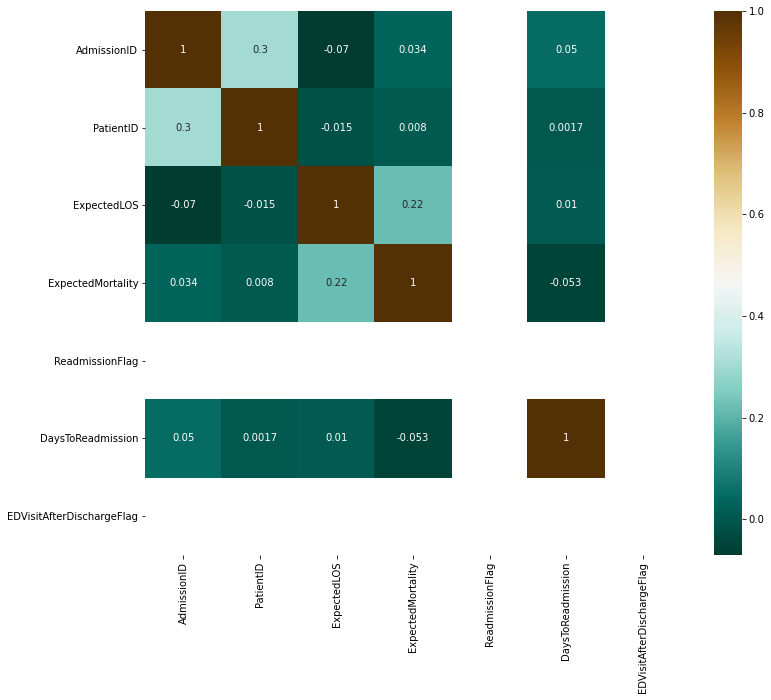

DataFrame: Patients


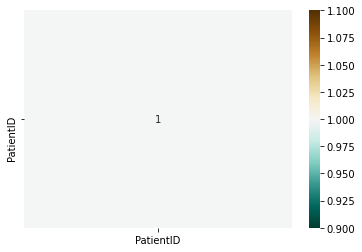

DataFrame: ED Visits


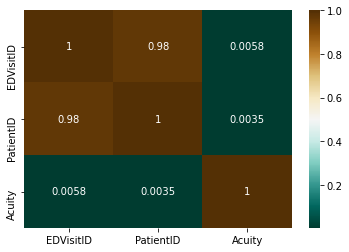

DataFrame: Ambulatory Visits


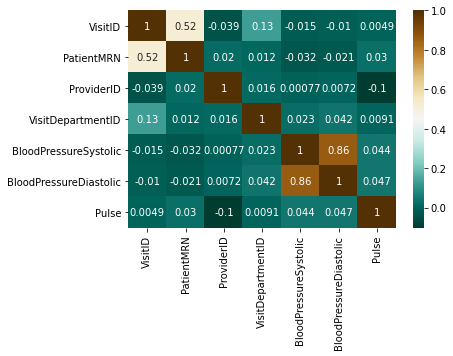

DataFrame: Discharges


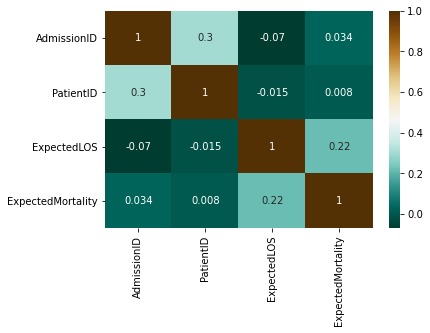

DataFrame: Providers


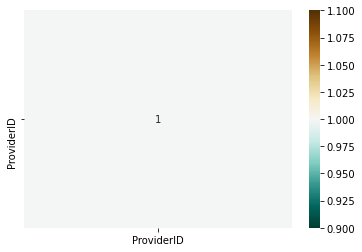

DataFrame: ED Unique


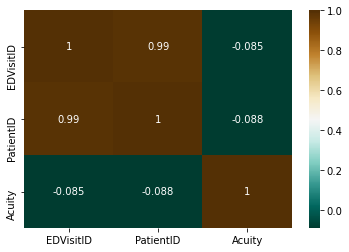

In [31]:
plt.figure(figsize=(12,10))
for i, value in enumerate(ls_name):
        print("DataFrame:",value)
        df=pd.DataFrame(ls_df[i])
        cor = df.corr()
        sns.heatmap(cor, annot=True, cmap=plt.cm.BrBG_r)
        plt.show()

In [35]:
df_EDV.groupby(['ReasonForVisit']).count()


,EDVisitID,PatientID,VisitDate,EDDischargeTime,Acuity,EDDisposition
ReasonForVisit,,,,,,
Accident,39,39,39,39,39,39
Bleeding,31,31,31,31,31,31
Car Accident,17,17,17,17,17,17
Chest Pain,109,109,109,109,109,109
Cough,1,1,1,1,1,1
Fever,234,234,234,234,234,234
Gun Shot,16,16,16,16,16,16
Intoxication,30,30,30,30,30,30
Laceration,30,30,30,30,30,30
